<a href="https://colab.research.google.com/github/kty9798/machine_learning_study/blob/main/risk_model(5_31).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.filterwarnings(action = "ignore")

In [8]:
# Read Training dataset as well as drop the index column
training_data = pd.read_csv('/content/drive/MyDrive/allbigdat/colab_result/data/cs-training.csv').drop('Unnamed: 0', axis = 1)


# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(training_data.columns)):
    cleancolumn.append(training_data.columns[i].replace('-', '').lower())
training_data.columns = cleancolumn

In [9]:
training_data.describe()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [10]:
import seaborn as sns

In [11]:
total_len = len(training_data['seriousdlqin2yrs'])
percentage_labels = (training_data['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels

0    93.316
1     6.684
Name: seriousdlqin2yrs, dtype: float64

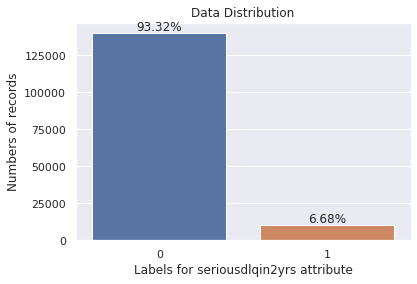

In [12]:
# Graphical representation of the target label percentage.
sns.set()
sns.countplot(training_data.seriousdlqin2yrs).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Numbers of records")
plt.show();


### 결과 변수가 불균형

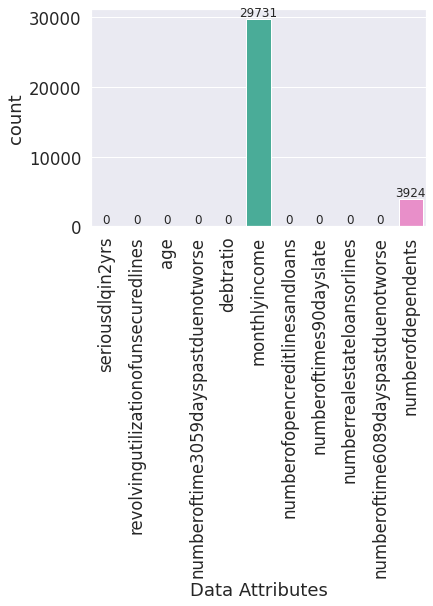

In [13]:
x =  training_data.columns
y = training_data.isnull().sum()

sns.barplot(x , y)
ax = plt.gca()
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2 , height +2 , int(height) , fontsize = 12 , ha ='center' , va = "bottom")

ax.set_xlabel("Data Attributes")
ax.set_ylabel("count")
plt.xticks(rotation = 90)
plt.show()


In [14]:
training_data_mean_replace = training_data.fillna(training_data.mean())
training_data_mean_replace.head()
training_data_mean_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

### 상관 관계 분석(correlation) 

In [15]:
training_data.fillna(training_data.median() , inplace = True)
training_data[training_data.columns[:-1]].corr()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse
seriousdlqin2yrs,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.017151,-0.029669,0.117175,-0.007038,0.102261
revolvingutilizationofunsecuredlines,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048
age,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159
numberoftime3059dayspastduenotworse,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005
debtratio,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533
monthlyincome,-0.017151,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252
numberofopencreditlinesandloans,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077
numberoftimes90dayslate,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796
numberrealestateloansorlines,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722
numberoftime6089dayspastduenotworse,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000


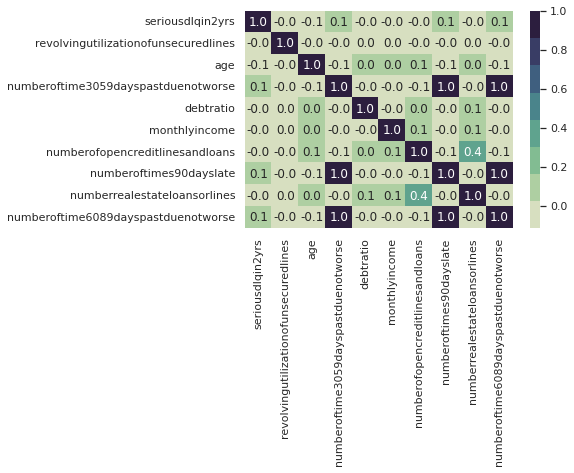

In [16]:
sns.set()
sns.heatmap(training_data[training_data.columns[:-1]].corr() , annot = True , fmt = ".1f",
            cmap = (sns.cubehelix_palette(8 , start = 0.5 , rot = -0.75)))
plt.show()

#### numbreoftimes90dayslate와 3059 date

### 이상점 검출 기법
- 백분위수(percentiles) 기반의 이상점 검출
- 중위(median) 절대 편차 기반의 이상점 검출(MAD)
-표준편차(sd) 기반의 이상점 검출
- 다수결(majority vote) 투표 기반의 이상점 검출
- 이상점의 시각화(visualization)

In [17]:
def mad_based_outlier(points, threshold =3.5):
    # if len(points.shape) == 1:
    #     points = points[:,None]
    median_y = np.median(points, axis=0)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold


In [18]:
#2.5~97.5까지만
def percentile_based_outlier(data , threshold = 95):
  diff  =  (100 - threshold) / 2.0
  (minval , maxval) = np.percentile(data , [diff , 100 - diff])
  return ((data < minval)| (data > maxval))

#percentile 이용 이상치 검출

    # IQR
def outliers_iqr(ys):
  quartile_1 , quartile_3 = np.percentile(ys , [25 ,75])
  iqr = quartile_3 - quartile_1

  lower_bound = quartile_1 - (1.5 *iqr)
  upper_bound = quartile_3 + (1.5*iqr)

  return np.where((ys > upper_bound) | ys<upper_bound)
  #여기서 np.where 이라는 것은 조건에 맞는 index를 반환하는 numpy 함수



def std_div(data , threshold = 3):
  std = data.std()
  mean= data.mean()
  isOutlier = []
  for val in data:
    if val/std >threshold:
      isOutlier.append(True)
    else:
      isOutlier.append(False)
  return isOutlier
#std_div(daa = training_data.age)

In [19]:
#다수결 투표 기반 이상점 검출 방법은 
def outlierVote(data):
  x = percentile_based_outlier(data)
  y = mad_based_outlier(data)
  z = std_div(data)
  temp = list(zip(data.index , x, y, z))
  final = []

  for i in range(len(temp)):
    if temp[i].count(False) >= 2:
      final.append(False)
    else:
      final.append(True)
  return final


In [20]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)
    
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

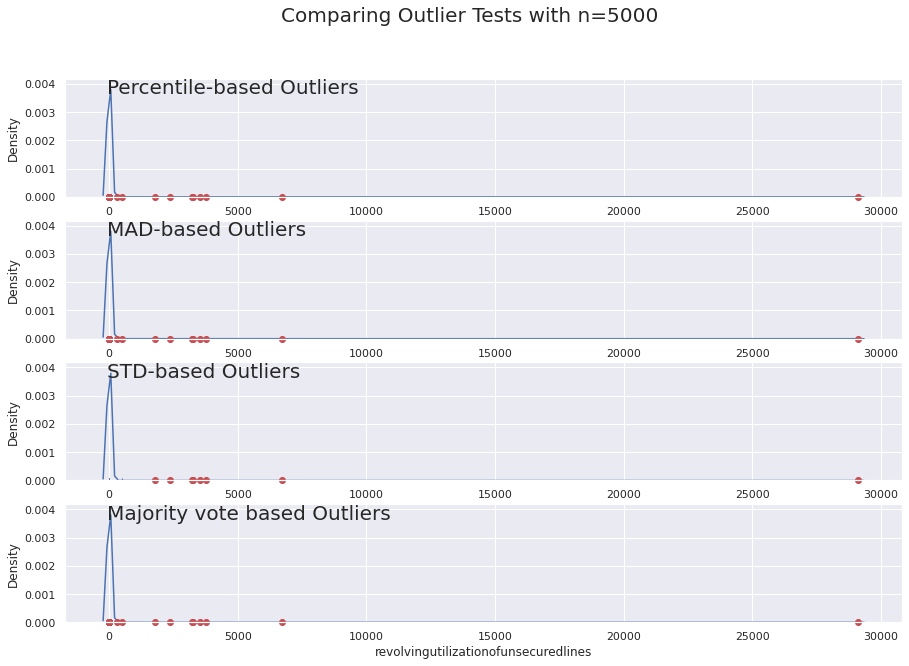

In [21]:
plotOutlier(training_data.revolvingutilizationofunsecuredlines.sample(5000))

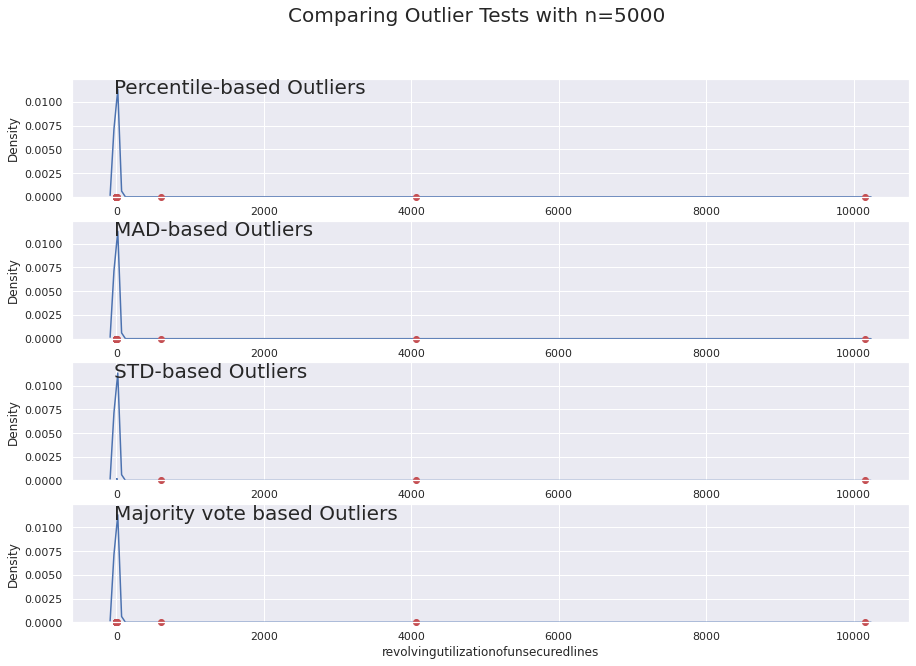

In [22]:
# Percentile based outlier detection
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    #return minval, maxval
    return ((data < minval) | (data > maxval))
#percentile_based_outlier(data=training_data.revolvingutilizationofunsecuredlines)

# Another percentile based outlier detection method which is based on inter quertile(IQR) range
# import numpy as np
# def outliers_iqr(ys):
#     quartile_1, quartile_3 = np.percentile(ys, [25, 75])
#     iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)
#     return np.where((ys > upper_bound) | (ys < lower_bound))

def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold
#mad_based_outlier(points=training_data.age)

def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier
#std_div(data=training_data.age)


def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp =list(zip(data.index, x, y, z))
    final = []
  
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final
#outlierVote(data=training_data.age)

def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

plotOutlier(training_data.revolvingutilizationofunsecuredlines.sample(5000))

#### 빈도 분석 
import collections 
collections.Counter(열) 하면 frequency 볼수 있음

##### 무담보 한도 이용 금액

In [23]:
revNew = []
for val in training_data.revolvingutilizationofunsecuredlines:
  if val <= 0.999999:
    revNew.append(val)
  else:
    revNew.append(0.999999)
  
training_data.revolvingutilizationofunsecuredlines = revNew

##### 나이

In [24]:
training_data.age.describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [25]:
import collections
collections.Counter(training_data.age)

Counter({0: 1,
         21: 183,
         22: 434,
         23: 641,
         24: 816,
         25: 953,
         26: 1193,
         27: 1338,
         28: 1560,
         29: 1702,
         30: 1937,
         31: 2038,
         32: 2050,
         33: 2239,
         34: 2155,
         35: 2246,
         36: 2379,
         37: 2521,
         38: 2631,
         39: 2987,
         40: 3093,
         41: 3122,
         42: 3082,
         43: 3208,
         44: 3294,
         45: 3502,
         46: 3714,
         47: 3719,
         48: 3806,
         49: 3837,
         50: 3753,
         51: 3627,
         52: 3609,
         53: 3648,
         54: 3561,
         55: 3416,
         56: 3589,
         57: 3375,
         58: 3443,
         59: 3280,
         60: 3258,
         61: 3522,
         62: 3568,
         63: 3719,
         64: 3058,
         65: 2594,
         66: 2494,
         67: 2503,
         68: 2235,
         69: 1954,
         70: 1777,
         71: 1646,
         72: 1649,
  

boxplot

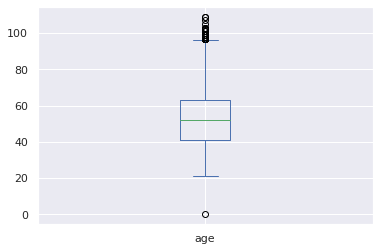

In [26]:
training_data.age.plot.box()

In [27]:
column =training_data.columns
for column_index , name in enumerate(column):
  print(column_index , ": " , name)

0 :  seriousdlqin2yrs
1 :  revolvingutilizationofunsecuredlines
2 :  age
3 :  numberoftime3059dayspastduenotworse
4 :  debtratio
5 :  monthlyincome
6 :  numberofopencreditlinesandloans
7 :  numberoftimes90dayslate
8 :  numberrealestateloansorlines
9 :  numberoftime6089dayspastduenotworse
10 :  numberofdependents


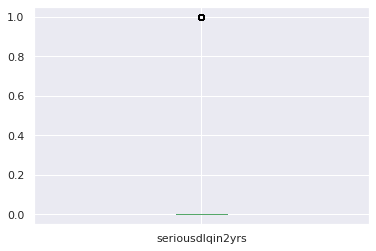

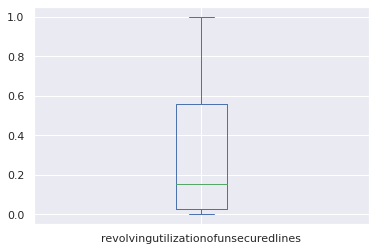

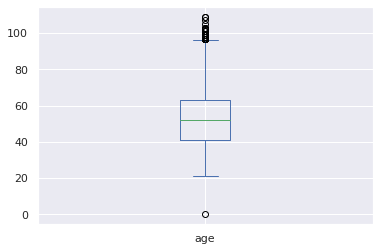

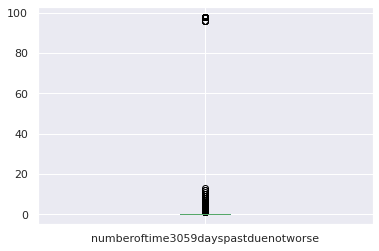

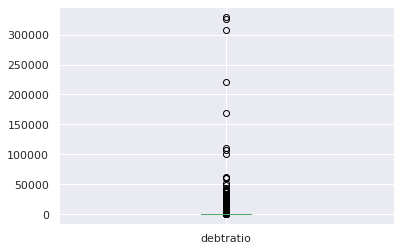

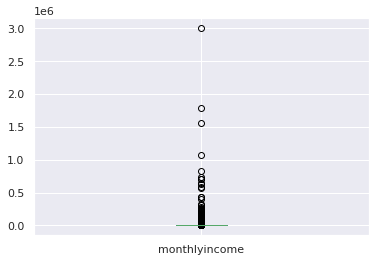

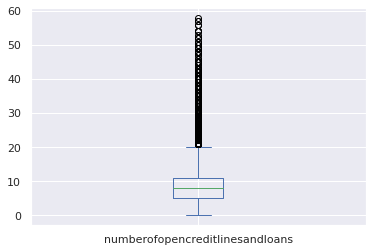

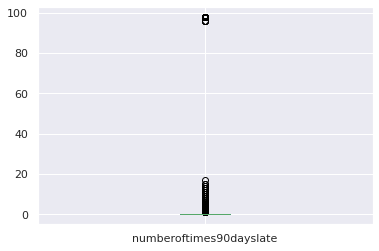

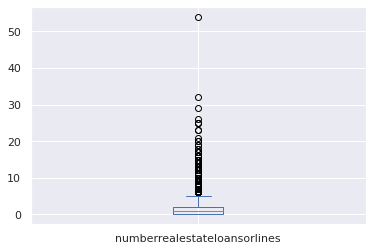

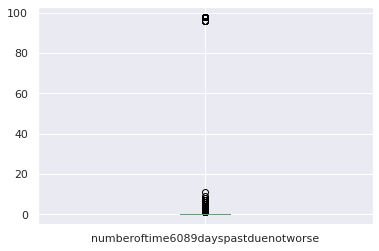

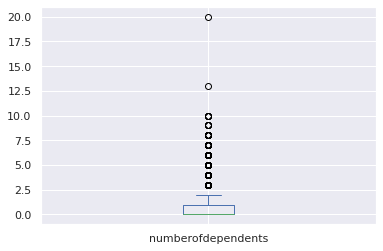

In [28]:
column =training_data.columns
for column_index , name in enumerate(column):
  
  training_data[name].plot.box()
  plt.show()

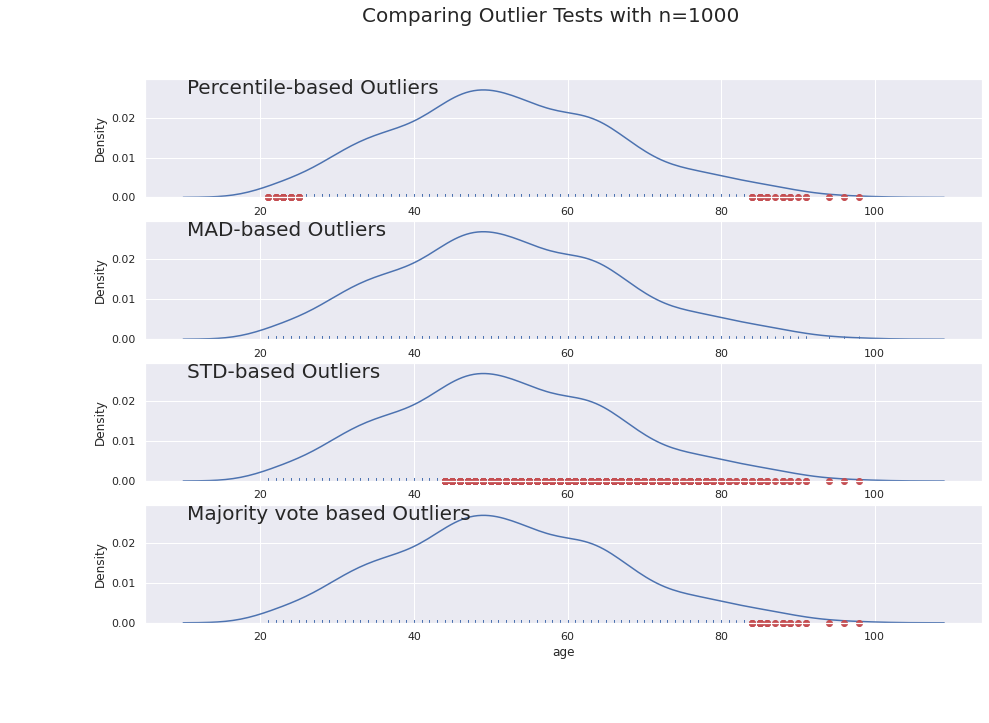

In [29]:
plotOutlier(training_data.age.sample(1000))

#### 이상치 제거

In [30]:
#### revlovingutil...

In [31]:
revNew = []
training_data.revolvingutilizationofunsecuredlines
for val in training_data.revolvingutilizationofunsecuredlines:
    if val <= 0.99999:
        revNew.append(val)
    else:
        revNew.append(0.99999)
training_data.revolvingutilizationofunsecuredlines = revNew

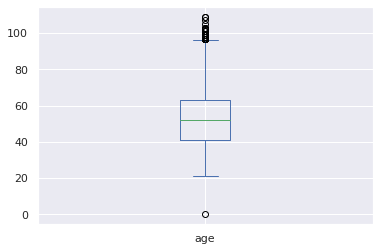

In [32]:
training_data.age.plot.box() #이상치 제거 필요...? #나이가 이상치일까...?

In [33]:
import collections 
collections.Counter(training_data.age) #0만 제거

Counter({0: 1,
         21: 183,
         22: 434,
         23: 641,
         24: 816,
         25: 953,
         26: 1193,
         27: 1338,
         28: 1560,
         29: 1702,
         30: 1937,
         31: 2038,
         32: 2050,
         33: 2239,
         34: 2155,
         35: 2246,
         36: 2379,
         37: 2521,
         38: 2631,
         39: 2987,
         40: 3093,
         41: 3122,
         42: 3082,
         43: 3208,
         44: 3294,
         45: 3502,
         46: 3714,
         47: 3719,
         48: 3806,
         49: 3837,
         50: 3753,
         51: 3627,
         52: 3609,
         53: 3648,
         54: 3561,
         55: 3416,
         56: 3589,
         57: 3375,
         58: 3443,
         59: 3280,
         60: 3258,
         61: 3522,
         62: 3568,
         63: 3719,
         64: 3058,
         65: 2594,
         66: 2494,
         67: 2503,
         68: 2235,
         69: 1954,
         70: 1777,
         71: 1646,
         72: 1649,
  

In [34]:
ageNew = []
for val in training_data.age:
  if val > 21:
    ageNew.append(val)
  else:
    ageNew.append(21)
    
training_data.age = ageNew 

##### numberoftime3059dayspastduenotworse

In [35]:
collections.Counter(training_data.numberoftime3059dayspastduenotworse)

Counter({0: 126018,
         1: 16033,
         2: 4598,
         3: 1754,
         4: 747,
         5: 342,
         6: 140,
         7: 54,
         8: 25,
         9: 12,
         10: 4,
         11: 1,
         12: 2,
         13: 1,
         96: 5,
         98: 264})

#### 데이터 소개
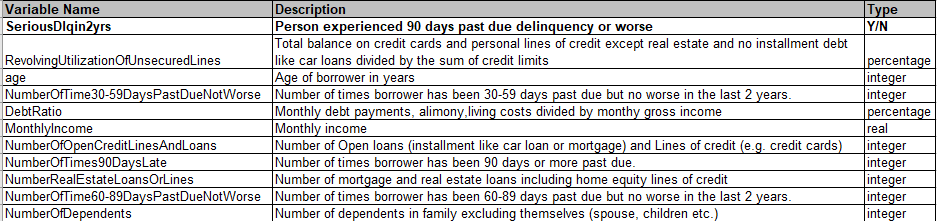

In [36]:
### 30 ~59 컬럼은 괜찮음 96 98을 중위수로 대체...
collections.Counter(training_data.numberoftime3059dayspastduenotworse)

Counter({0: 126018,
         1: 16033,
         2: 4598,
         3: 1754,
         4: 747,
         5: 342,
         6: 140,
         7: 54,
         8: 25,
         9: 12,
         10: 4,
         11: 1,
         12: 2,
         13: 1,
         96: 5,
         98: 264})

In [37]:
import time


start = time.time()
New = []
med = training_data.numberoftime3059dayspastduenotworse.median()
for val in training_data.numberoftime3059dayspastduenotworse:
  if (val==96) | (val==98):
    New.append(med)
  else:
    New.append(val)


training_data.numberoftime3059dayspastduenotworse = New    
end = time.time()
print(f"using time is {end - start}")

using time is 0.08671832084655762


부채비율

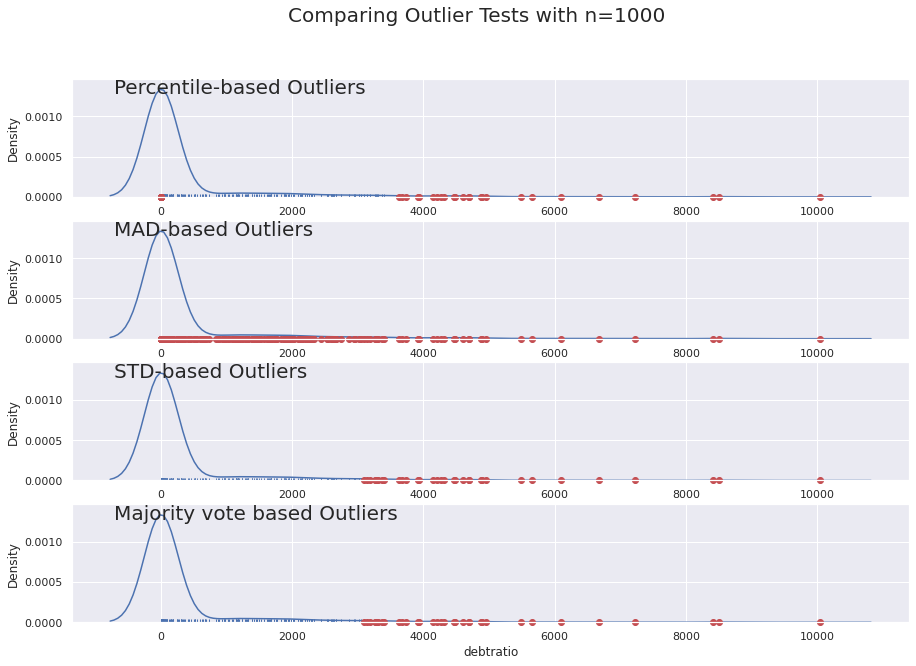

In [38]:
plotOutlier(training_data.debtratio.sample(1000)) #심각

In [39]:
import time
def outlierRatio(data):
  start_time = time.time()
  functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
  outlierDict = {}
  for func in functions:
    funcResult = func(data)
    count = 0
    for val in funcResult:
      if val == True:
        count+=1
    outlierDict[str(func)[10:].split()[0]] = [count , '{:.2f}%'.format(float(count)/ len(data) * 100)]
    end_time = time.time()
  return outlierDict , end_time - start_time

In [40]:
result , time = outlierRatio(training_data.debtratio)

print(result)
print(time)

{'percentile_based_outlier': [3750, '2.50%'], 'mad_based_outlier': [31727, '21.15%'], 'std_div': [779, '0.52%'], 'outlierVote': [3750, '2.50%']}
1.068359375


In [41]:
#mad_based_outlier가 가장 많은 outlier을 검출하였으므로 해당 사용
#최소 상계란 이상값에서 파생ㄱ됱 최솟값

In [42]:
len(mad_based_outlier(training_data.debtratio))

150000

In [43]:
#MinUpperBound  = min([val for (val , out) in zip(training_data.debtratio , mad_based_outlier(training_data.debtratio))])

In [44]:
#MinUpperBound

In [45]:
# newDebtratio = list()
# for val in training_data.debtratio:
#   if val > MinUpperBound:
#     newDebtratio.append(MinUpperBound)
#   else:
#     newDebtratio.append(val)
# training_data.debratio = newDebtratio

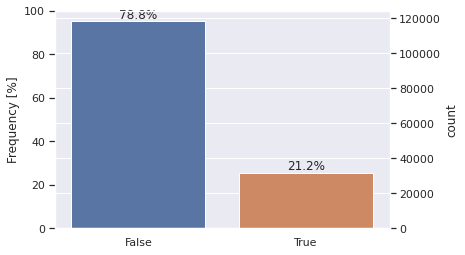

In [46]:
def add_freq():
    ncount = len(training_data)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)
ax = sns.countplot(mad_based_outlier(training_data.debtratio))

add_freq()

In [47]:
minUpperBound = min([val for (val, out) in zip(training_data.debtratio, mad_based_outlier(training_data.debtratio)) if out == True])

In [48]:
newDebtRatio = []
for val in training_data.debtratio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

training_data.debtratio = newDebtRatio 

복사한것 

In [49]:
def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(zip(data, vote), columns=['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

In [50]:
incomeNew = replaceOutlier(training_data.monthlyincome, replace='minUpper')

In [51]:
training_data.monthlyincome = incomeNew

training_data.monthlyincome

##### 90일 연체 횟수
- 담보대출 및 한도대출 수 대체부양 가족수 전처리

In [52]:
def removeSpecificAndPutMedian(data, first = 98, second = 96):
    New = []
    med = data.median()
    for val in data:
        if ((val == first) | (val == second)):
            New.append(med)
        else:
            New.append(val)
            
    return New
new = removeSpecificAndPutMedian(training_data.numberoftimes90dayslate)
training_data.numberoftimes90dayslate = new

In [53]:
collections.Counter(training_data.numberrealestateloansorlines)

realNew = []
for val in training_data.numberrealestateloansorlines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)
training_data.numberrealestateloansorlines = realNew

In [54]:
new = removeSpecificAndPutMedian(training_data.numberoftime6089dayspastduenotworse)
training_data.numberoftime6089dayspastduenotworse = new
collections.Counter(training_data.numberofdependents)

depNew = []
for var in training_data.numberofdependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)



training_data.numberofdependents = depNew

## 특징 공학


특징은 예측 모델을 개발하는 것에 중요함
- 입력 변수 중 어느것이 최소한의 정확도를 제공하는지 알아야 함

- 특징 중요도를 알아내기(랜덤 포레스트 분류기 이용)

In [55]:
from sklearn.ensemble import RandomForestClassifier


X = training_data.drop('seriousdlqin2yrs' , axis = 1)
y= training_data.seriousdlqin2yrs

features_label = training_data.columns[1:]
rf_model = RandomForestClassifier(n_estimators = 1000 , random_state = 0 , n_jobs = -1)
rf_model.fit(X  , y)
importances  = rf_model.feature_importances_



In [56]:
indices = np.argsort(importances)[::-1] #feature importance 중요한 순으로 정렬
#np.argsort란
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.189645
 2) age                            0.154666
 3) numberoftime3059dayspastduenotworse 0.150661
 4) debtratio                      0.142028
 5) monthlyincome                  0.098306
 6) numberofopencreditlinesandloans 0.087733
 7) numberoftimes90dayslate        0.050376
 8) numberrealestateloansorlines   0.045751
 9) numberoftime6089dayspastduenotworse 0.044263
10) numberofdependents             0.036570


In [57]:
importances[::-1]

array([0.04426259, 0.04575083, 0.03657022, 0.08773306, 0.0983061 ,
       0.1506608 , 0.15466644, 0.05037648, 0.14202806, 0.18964542])

In [58]:
importances  = rf_model.feature_importances_

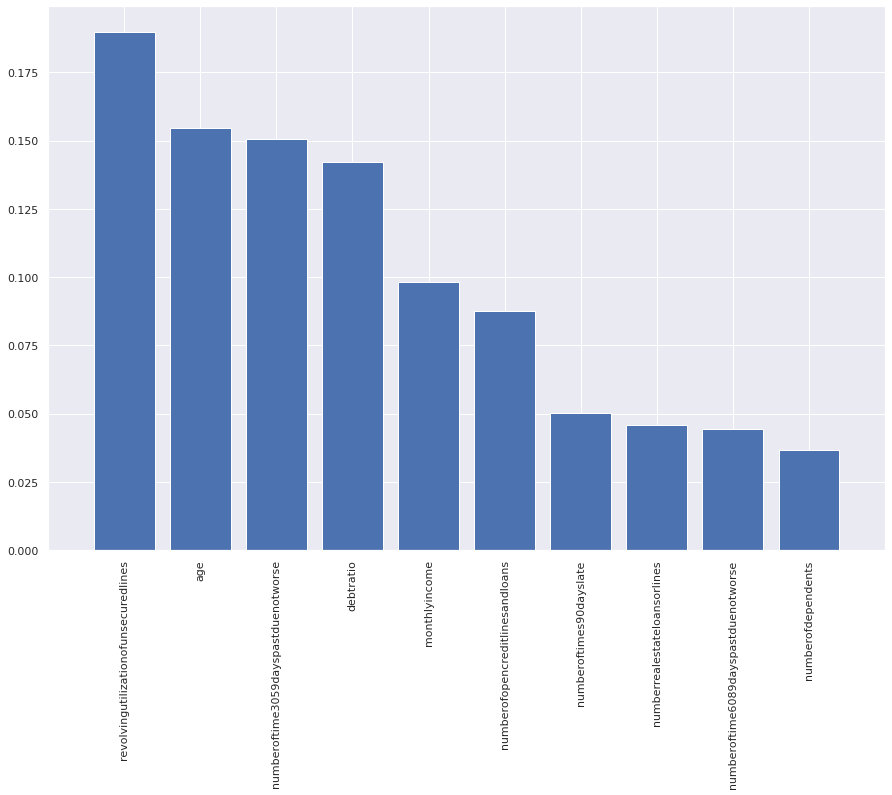

In [59]:
fig , axes = plt.subplots(figsize= (15, 10))
axes.bar(range(X.shape[1]) , importances[indices] , align = "center")
plt.xticks(range(X.shape[1]) , features_label, rotation = 90)
plt.xlim([-1 , X.shape[1]])
plt.show()

### machine learning 알고리즘 선택(6_3)

어떤 알고리즘이 가장 성능이 좋은지 확인

- K 최근접 알고리즘(K-NEAREASET)
- 로지스틱 회귀
- 아다 부스트
- 그레디이언트부스팅
- 랜덤포레스트

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [61]:
X = training_data.drop("seriousdlqin2yrs" , axis = 1)
y = training_data.seriousdlqin2yrs

X_train  , X_test , y_train , y_test = train_test_split(X  , y, test_size = 0.25)

- n_neighbors -> 이웃 수 
- weights 가중치는 일    
- algorithm
- leaf_size 
- p는 민코프스키 계량 

In [62]:
KnMod = KNeighborsClassifier(n_neighbors= 5 , weights  = "uniform", algorithm = "auto" , leaf_size = 30 , p = 2 , metric = "minkowski" ,  metric_params  = None)

- penalty : 경사 하강 알고리즘 선택
- tol = 0.0001 은 알고리즘의 중단 기준중 하나
- C  = regulation 즉 규제화에 대한 것
- multi class =이진 분류 문제
- verbose는 파라미터에서 liblinear을 이용할 시 양수로

In [63]:
LrMod = LogisticRegression(penalty = "l1" , dual  = False , tol = 0.0001 , C = 1.0 , fit_intercept = True,
                             intercept_scaling = 1 , class_weight = None , random_state = None , solver = 'liblinear'
                             , max_iter = 100  , multi_class=  'ovr' , verbose = 2) #표적 레이블을 예측하기 위해서 시그모이드 및 비선형 함수를 사용하여 표적 변수에 대한 확률 생성


adaboost 는 적응형 증폭 으로 부스팅 계열 앙상블 모델 

- base_estimator : 기저 추정기
- n_estimator : 증폭이 종료되는 최대 추정 횟수
- learning_rate : learning_rate 학습모델 수렴 정도 결정

In [64]:
adaMod = AdaBoostClassifier(base_estimator = None , n_estimators  = 200 , learning_rate = 1.0)

## Gradient Boosting (경사도 증폭) 알고리즘 

- loss=  "deviance" 확률적 출력으로 분류하기 위해서 로지스틱 회귀 분석을 사용한다는 점을 의미
- n_estimators : 수행해야 하는 총 증폭 단계 수
- subsample : 편향과 분산을 조젏나ㅡㄴ데 도움 
- min_sample_split : 내부 노드를 분할하는데 필요한 최소 표본 수
- min_weight_fraction_leaf
- max_features 

In [65]:
gbMod=  GradientBoostingClassifier(loss = "deviance", learning_rate = 0.1  , n_estimators = 200 , subsample = 1.0 , min_samples_split = 2 , min_samples_leaf = 1 , min_weight_fraction_leaf = 0.0 , max_depth = 3 , init= None , random_state= None , max_features = None , verbose = 0)


In [66]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [67]:
KnMod.fit(X_train , y_train)

KNeighborsClassifier()

In [68]:
model_list = [KnMod , LrMod , adaMod , gbMod , rfMod]
for index , model in enumerate(model_list):
  model.fit(X_train , y_train)
  print(f"{model} is fitted")

KNeighborsClassifier() is fitted
[LibLinear]LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear',
                   verbose=2) is fitted
AdaBoostClassifier(n_estimators=200) is fitted
GradientBoostingClassifier(n_estimators=200) is fitted
RandomForestClassifier(n_estimators=10, n_jobs=1) is fitted


### 테스트 계량 이해
어떤 모델의 성능이 가장 좋을까


* 훈련된 모델의 평균 정확도
* ROC-AUC 점수

- sklearn의 scrore는 평균오차를 반환함(technically 표준 오차)
- ROC-AUC 점수는 분류기의 정확도를 확인하는 데 사용됨

- roc 수신자 획득 곡선
- auc area under the curve

In [69]:
KnMod.score(X_test , y_test)

0.9310933333333333

In [70]:
test_labels = KnMod.predict_proba(np.array(X_test.values))[: , 1]

In [71]:
KnMod.predict_proba(np.array(X_test.values))[: , 1]

array([0., 0., 0., ..., 0., 0., 0.])

In [72]:
roc_auc_score(y_test , test_labels , average = "macro" , sample_weight = None)

0.591333709252827

In [73]:
y_test

104836    0
83774     0
37343     0
11139     0
5276      0
         ..
85337     1
47125     0
91150     0
126865    0
47819     0
Name: seriousdlqin2yrs, Length: 37500, dtype: int64

In [74]:
gbMod.score(X_test ,y_test)

0.9354133333333333

In [75]:
gb_test_label = gbMod.predict_proba(np.array(X_test.values))[: , 1]
roc_auc_score(y_test , gb_test_label  , average = "macro" , sample_weight = None)

0.8633855573089352

In [76]:
print(f"adaboost model score is {adaMod.score(X_test , y_test)}")
ada_label = adaMod.predict_proba(np.array(X_test.values))[: , 1]
roc_auc_score(y_test , ada_label , average = "macro")

adaboost model score is 0.9338933333333334


0.8585826127490986

In [77]:
print(f"Logistic Legression model score is {LrMod.score(X_test , y_test)}")
Lr_label = LrMod.predict_proba(np.array(X_test.values))[: , 1]
roc_auc_score(y_test , Lr_label , average = "macro")

Logistic Legression model score is 0.9351733333333333


0.8495144522598496

In [78]:
print(f"RandomForest model score is {rfMod.score(X_test , y_test)}")
rf_label = rfMod.predict_proba(np.array(X_test.values))[: , 1]
roc_auc_score(y_test , rf_label , average = "macro" , sample_weight = None)

RandomForest model score is 0.93184


0.7712235533241221

### 모델 정확도를 늘리기 위한 기법 적용

In [79]:
#1. 과적합 문제를 확인하기 위해 교차 검증을 수행하지 않았음 cross validation as well known as CV
#2. model hyperparameter optimization 을 통해서 모델 성능을 늘리기 

교차검증은 회전 추정이라고 하며 과적합을 추적하는데 이용됨
- 가장 유명한 Kfold 교차검증을 이용하여 (사이킷런에 있음)

hyperparameter은 모델이 학습되도 학습할 수 없는 것들
조율하는 느낌 

- gridsearch 시간이 너무 오래걸림
- randomsearch

In [80]:
# 교차검증 기반 접근법 구현

In [84]:
len(X)


150000

In [81]:
#CvDictGen(         )
from sklearn.model_selection import cross_val_score
def cvDictGen(functions , scr , x_train  = X , y_train = y , cv =5 , verbose = 1):
  cvDict = dict()
  for func in functions: 
    cvScore = cross_val_score(func , X_train , y_train , cv= cv , verbose = verbose , scoring = scr)
    cvDict[str(func).split('(')[0]] = [cvScore.mean() , cvScore.std() ] 


def cvDictNormalize(cvdict):
  cvDictNormalized = dict()
  for keys in cvdict.keys():
    for i in cvdict[keys]:
      cvDictNormalized[keys] = ['{:0.2f}'.format((cvdict[keys][0]/cvdict[cvdict.keys()[0]][0])),
                               '{:0.2f}'.format((cvdict[keys][1]/cvdict[cvdict.keys()[0]][1]))]
  return cvDictNormalized                     

In [85]:
cvD = cvDictGen(functions = [KnMod] , scr = "roc_auc")
cvD

ValueError: ignored